In [274]:
# Dependencies
import requests
import json
import prettytable
import pandas as pd
import matplotlib.pyplot as plt

In [275]:
# Series IDs are for the categories representative of the metrics used by US Bureau of Labor
# JTU000000480000000JOL: Job openings in the state of Texas in all non-farm industries, with companies of all sizes,
# Values shown in thousands
#LAUST480000000000006: Labor Force in state of Texas
#LAUST480000000000005: Employment # in state of Texas
#LAUST480000000000004: Unemployment in # in the state of Texas
#LAUST480000000000003: Unemployment Rate in the state in Texas 

In [276]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['JTU000000480000000JOL','LAUST480000000000006', 'LAUST480000000000005', 'LAUST480000000000003', 'LAUST480000000000004'],"startyear":"2018", "endyear":"2022"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()
# json_data

In [277]:
# There were 863,000 non-farm job openings in Texas in Dec 2022
json_data["Results"]["series"][0]['data'][0]["value"]

'863'

In [278]:
# Get the year
json_data["Results"]["series"][0]["data"][0]["year"]

'2022'

In [279]:
# There were 14,773,989 people in the labor force in Dec 2022
json_data["Results"]["series"][1]["data"][0]["value"]

'14773939'

In [280]:
# Store the year, period, and periodName, and # of job openings in columns of the dataframe
year = []
period = []
periodName = []
value = []
num_series = len(json_data["Results"]["series"][0]["data"])
series_data = json_data["Results"]["series"][0]["data"]

for i in range(num_series):
    year.append(series_data[i]["year"])
    period.append(series_data[i]["period"])
    periodName.append(series_data[i]["periodName"])
    value.append(series_data[i]["value"])

# Create a dataframe from these columns
job_openings = pd.DataFrame({"Year": year,
                            "Period": period,
                            "Month": periodName,
                            "# of job openings (thousands)": value})

# Since the last column contains string values, we convert them to integers
job_openings["# of job openings (thousands)"] = job_openings["# of job openings (thousands)"].astype(float)

# Show # of job openings in the actual thousand values
job_openings["# of job openings"] = job_openings["# of job openings (thousands)"]*1000

# Drop the duplicate column
job_openings = job_openings.drop(columns=["# of job openings (thousands)"])

# Print the dataframe
job_openings

,Year,Period,Month,# of job openings
0,2022,M12,December,863000.0
1,2022,M11,November,811000.0
2,2022,M10,October,962000.0
3,2022,M09,September,1028000.0
4,2022,M08,August,971000.0
5,2022,M07,July,1115000.0
6,2022,M06,June,1038000.0
7,2022,M05,May,967000.0
8,2022,M04,April,1104000.0
9,2022,M03,March,999000.0


In [281]:
# Store the year, period, and periodName, and labor force # in columns of the dataframe
year1 = []
period1 = []
periodName1 = []
value1 = []
num_series1 = len(json_data["Results"]["series"][1]["data"])
series_data1 = json_data["Results"]["series"][1]["data"]

for i in range(num_series1):
    year1.append(series_data1[i]["year"])
    period1.append(series_data1[i]["period"])
    periodName1.append(series_data1[i]["periodName"])
    value1.append(series_data1[i]["value"])

# Create a dataframe from these columns
labor_force = pd.DataFrame({"Year": year1,
                            "Period": period1,
                            "Month": periodName1,
                            "Labor Force": value1})

# Print the dataframe
labor_force.head()

,Year,Period,Month,Labor Force
0,2022,M12,December,14773939
1,2022,M11,November,14765864
2,2022,M10,October,14731841
3,2022,M09,September,14685013
4,2022,M08,August,14674216


In [282]:
# Store the year, period, and periodName, and the employment # in columns of the dataframe
year2 = []
period2 = []
periodName2 = []
value2 = []
num_series2 = len(json_data["Results"]["series"][2]["data"])
series_data2 = json_data["Results"]["series"][2]["data"]

for i in range(num_series2):
    year2.append(series_data2[i]["year"])
    period2.append(series_data2[i]["period"])
    periodName2.append(series_data2[i]["periodName"])
    value2.append(series_data2[i]["value"])

# Create a dataframe from these columns
employment_number = pd.DataFrame({"Year": year2,
                            "Period": period2,
                            "Month": periodName2,
                            "Employment Number": value2})

# Print the dataframe
employment_number.head()

,Year,Period,Month,Employment Number
0,2022,M12,December,14260768
1,2022,M11,November,14222585
2,2022,M10,October,14189171
3,2022,M09,September,14142120
4,2022,M08,August,14094855


In [283]:
# Store the year, period, and periodName, and the unemployment rate in columns of the dataframe
year3 = []
period3 = []
periodName3 = []
value3 = []
num_series3 = len(json_data["Results"]["series"][3]["data"])
series_data3 = json_data["Results"]["series"][3]["data"]

for i in range(num_series3):
    year3.append(series_data3[i]["year"])
    period3.append(series_data3[i]["period"])
    periodName3.append(series_data3[i]["periodName"])
    value3.append(series_data3[i]["value"])

# Create a dataframe from these columns
unemployment_rate = pd.DataFrame({"Year": year3,
                            "Period": period3,
                            "Month": periodName3,
                            "Unemployment Rate": value3})

# Print the dataframe
unemployment_rate

,Year,Period,Month,Unemployment Rate
0,2022,M12,December,3.5
1,2022,M11,November,3.7
2,2022,M10,October,3.7
3,2022,M09,September,3.7
4,2022,M08,August,3.9
5,2022,M07,July,4.0
6,2022,M06,June,4.2
7,2022,M05,May,3.6
8,2022,M04,April,3.5
9,2022,M03,March,3.8


In [284]:
# Store the year, period, and periodName, and the unemployment # in columns of the dataframe
year4 = []
period4 = []
periodName4 = []
value4 = []
num_series4 = len(json_data["Results"]["series"][4]["data"])
series_data4 = json_data["Results"]["series"][4]["data"]

for i in range(num_series4):
    year4.append(series_data4[i]["year"])
    period4.append(series_data4[i]["period"])
    periodName4.append(series_data4[i]["periodName"])
    value4.append(series_data4[i]["value"])

# Create a dataframe from these columns
unemployment_number = pd.DataFrame({"Year": year4,
                            "Period": period4,
                            "Month": periodName4,
                            "Unemployment Number": value4})


# Print the dataframe
unemployment_number

,Year,Period,Month,Unemployment Number
0,2022,M12,December,513171
1,2022,M11,November,543279
2,2022,M10,October,542670
3,2022,M09,September,542893
4,2022,M08,August,579361
5,2022,M07,July,590021
6,2022,M06,June,614934
7,2022,M05,May,531312
8,2022,M04,April,516170
9,2022,M03,March,552714


In [285]:
# Call the CPI from website and JSONify it
cpi_url = "https://data.texas.gov/resource/karz-jr5v.json"
cpi_data = requests.get(cpi_url).json()

cpi_data

[{'month': '1',
  'year': '2005',
  'nonfarm_employment_il_detail': '5829.60',
  'nonfarm_employment_fl_detail': '7650.20',
  'nonfarm_employment_ny_detail': '8490.60',
  'nonfarm_employment_tx_detail': '9642.40',
  'nonfarm_employment_ca_detail': '14881.80'},
 {'month': '2',
  'year': '2005',
  'nonfarm_employment_il_detail': '5836.20',
  'nonfarm_employment_fl_detail': '7670.70',
  'nonfarm_employment_ny_detail': '8487.90',
  'nonfarm_employment_tx_detail': '9653.20',
  'nonfarm_employment_ca_detail': '14908.30'},
 {'month': '3',
  'year': '2005',
  'nonfarm_employment_il_detail': '5833.80',
  'nonfarm_employment_fl_detail': '7668.70',
  'nonfarm_employment_ny_detail': '8483.60',
  'nonfarm_employment_tx_detail': '9670.80',
  'nonfarm_employment_ca_detail': '14929.30'},
 {'month': '4',
  'year': '2005',
  'nonfarm_employment_il_detail': '5857.50',
  'nonfarm_employment_fl_detail': '7716.40',
  'nonfarm_employment_ny_detail': '8518.60',
  'nonfarm_employment_tx_detail': '9715.10',
  '

In [286]:
# Create a dataframe for the CPI data of state of TX
year_cpi = []
month = []
cpi_tx = []

for i in range(1, len(cpi_data)): 
    cpi_data[i]["year"] = int(cpi_data[i]["year"])
    year = cpi_data[i]["year"]
    if (year >= 2018) and (year <= 2022):
        month.append(cpi_data[i]["month"])
        year_cpi.append(cpi_data[i]["year"])
        cpi_tx.append(cpi_data[i]["cpi_tx"])
        

cpi_tx_df = pd.DataFrame({"Year": year_cpi,
                         "Period": month,
                         "CPI of TX": cpi_tx})

cpi_tx_df.head()

,Year,Period,CPI of TX
0,2018,1,225.954
1,2018,2,227.441
2,2018,3,227.746
3,2018,4,228.152
4,2018,5,230.043


In [287]:
# Create a new Period column for merging purpose
cpi_tx_df['Period_New'] = cpi_tx_df['Period'].replace({'1': 'M01', '2': 'M02', '3': 'M03', '4': 'M04', '5': 'M05', '6': 'M06', '7': 'M07',
                            '8': 'M08', '9': 'M09', '10': 'M10', '11': 'M11', '12': 'M12'})
cpi_tx_df.head()

,Year,Period,CPI of TX,Period_New
0,2018,1,225.954,M01
1,2018,2,227.441,M02
2,2018,3,227.746,M03
3,2018,4,228.152,M04
4,2018,5,230.043,M05


In [288]:
# Merge dataframes together
merge_1 = pd.merge(job_openings, labor_force, how = "outer", on=["Year", "Period", "Month"])
merge_2 = pd.merge(merge_1, employment_number, how = "outer", on=["Year", "Period", "Month"])
merge_3 = pd.merge(merge_2, unemployment_rate, how = "outer", on=["Year", "Period", "Month"])
merge_4 = pd.merge(merge_3, unemployment_number, how = "outer", on=["Year", "Period", "Month"])
merge_4.head()

,Year,Period,Month,# of job openings,Labor Force,Employment Number,Unemployment Rate,Unemployment Number
0,2022,M12,December,863000.0,14773939,14260768,3.5,513171
1,2022,M11,November,811000.0,14765864,14222585,3.7,543279
2,2022,M10,October,962000.0,14731841,14189171,3.7,542670
3,2022,M09,September,1028000.0,14685013,14142120,3.7,542893
4,2022,M08,August,971000.0,14674216,14094855,3.9,579361


In [289]:
merge_4['Year'] = merge_4['Year'].astype(int)
merge_4['Labor Force'] = merge_4['Labor Force'].astype(float)
merge_4['Employment Number'] = merge_4['Employment Number'].astype(float)
merge_4['Unemployment Rate'] = merge_4['Unemployment Rate'].astype(float)
merge_4['Unemployment Number'] = merge_4['Unemployment Number'].astype(float)

In [290]:
merge_4.head()

,Year,Period,Month,# of job openings,Labor Force,Employment Number,Unemployment Rate,Unemployment Number
0,2022,M12,December,863000.0,14773939.0,14260768.0,3.5,513171.0
1,2022,M11,November,811000.0,14765864.0,14222585.0,3.7,543279.0
2,2022,M10,October,962000.0,14731841.0,14189171.0,3.7,542670.0
3,2022,M09,September,1028000.0,14685013.0,14142120.0,3.7,542893.0
4,2022,M08,August,971000.0,14674216.0,14094855.0,3.9,579361.0


In [291]:
merge_4.dtypes

Year                     int32
Period                  object
Month                   object
# of job openings      float64
Labor Force            float64
Employment Number      float64
Unemployment Rate      float64
Unemployment Number    float64
dtype: object

In [292]:
cpi_tx_df["CPI of TX"] = cpi_tx_df["CPI of TX"].astype(float)

In [293]:
cpi_tx_df.dtypes

Year            int64
Period         object
CPI of TX     float64
Period_New     object
dtype: object

In [294]:
merge_5 = pd.merge(merge_4, cpi_tx_df, how = "outer", left_on = ["Year", "Period"], right_on=["Year", "Period_New"])
merge_5.head()

,Year,Period_x,Month,# of job openings,Labor Force,Employment Number,Unemployment Rate,Unemployment Number,Period_y,CPI of TX,Period_New
0,2022,M12,December,863000.0,14773939.0,14260768.0,3.5,513171.0,12,268.366,M12
1,2022,M11,November,811000.0,14765864.0,14222585.0,3.7,543279.0,11,270.579,M11
2,2022,M10,October,962000.0,14731841.0,14189171.0,3.7,542670.0,10,270.924,M10
3,2022,M09,September,1028000.0,14685013.0,14142120.0,3.7,542893.0,9,271.469,M09
4,2022,M08,August,971000.0,14674216.0,14094855.0,3.9,579361.0,8,270.490,M08


In [295]:
merge_5 = merge_5.drop(columns = ["Period_New", "Period_y"])

In [296]:
merge_5 = pd.DataFrame((merge_5.rename(columns={"Period_x": "Period"})))

In [297]:
merge_5.head()

,Year,Period,Month,# of job openings,Labor Force,Employment Number,Unemployment Rate,Unemployment Number,CPI of TX
0,2022,M12,December,863000.0,14773939.0,14260768.0,3.5,513171.0,268.366
1,2022,M11,November,811000.0,14765864.0,14222585.0,3.7,543279.0,270.579
2,2022,M10,October,962000.0,14731841.0,14189171.0,3.7,542670.0,270.924
3,2022,M09,September,1028000.0,14685013.0,14142120.0,3.7,542893.0,271.469
4,2022,M08,August,971000.0,14674216.0,14094855.0,3.9,579361.0,270.490


In [298]:
#Create a function to group data into quarter
def quarter(value):
    if value in ["January","February", "March"]:
        return "Q1"
    elif value in ["April","May", "June"]:
        return "Q2"
    elif value in ["July","August", "September"]:
        return "Q3"
    else:
        return "Q4"
 
merge_5['Quarter'] = merge_5['Month'].map(quarter)
merge_5.head()


# merge_5['FYQ'] = str(merge_5['Year']) + merge_5['Quarter']
# merge_5

# year = merge_5["Year"]
# year = year.astype(int)
# year = str[year]
# year
# merge_5.dtypes

,Year,Period,Month,# of job openings,Labor Force,Employment Number,Unemployment Rate,Unemployment Number,CPI of TX,Quarter
0,2022,M12,December,863000.0,14773939.0,14260768.0,3.5,513171.0,268.366,Q4
1,2022,M11,November,811000.0,14765864.0,14222585.0,3.7,543279.0,270.579,Q4
2,2022,M10,October,962000.0,14731841.0,14189171.0,3.7,542670.0,270.924,Q4
3,2022,M09,September,1028000.0,14685013.0,14142120.0,3.7,542893.0,271.469,Q3
4,2022,M08,August,971000.0,14674216.0,14094855.0,3.9,579361.0,270.490,Q3


In [312]:
#Pull population data from census API 
years = ['2018', '2019', '2021']
json_data = []
for year in years:
    url = 'https://api.census.gov/data/' + year + '/acs/acs1?get=NAME,B01001_001E&for=state:*&key='
    api_key = '63fb3b0cbcbf3a600f53258899d3161c030c12fb'
    census_url = url + api_key
    response = requests.get(census_url).json()
    json_data.append(response)

census_data = []
for i in range(len(json_data)):
    for j in range(len(json_data[i])):
        if json_data[i][j][0] == 'Texas':
            census_data.append(json_data[i][j])

population_2018 = census_data[0][1]
population_2019 = census_data[1][1]
#2020 census data was not available via the API, so we had to harcode it in based on a google search
population_2020 = 29145505
population_2021 = census_data[1][1]
population_2022 = 30029572

In [336]:
# Rent Index 
dates = "2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28"
date_list = dates.split(",")
print(date_list)

date_list

rent_index_values = [1214.335022261143,1219.6879106672407,1239.3322227363653,1249.2982674839582,1260.7487873612242,1261.2147313765338,1258.3073997938366,1250.3533381521036,1249.160762562712,1255.5193437837138,1263.6462919206494,1268.742637186485,1276.7822032027457,1285.0027612529989,1290.0825248232434,1293.3360767755626,1296.6775695944107,1273.3508731810903,1270.7406137084886,1267.0396846042806,1271.7538012327036,1269.791565756071,1268.3690467391896,1290.6295828982104,1301.8183753832675,1314.4126484421274,1321.1538712417425,1328.486606011169,1331.1326326502851,1327.973005274739,1313.6165628590081,1304.5500330990938,1300.4043316499276,1302.9131585143155,1301.1361519628995,1304.1593427524042,1312.5252031474852,1325.6731740265805,1339.9764433381108,1353.9552995503084,1373.1023437729684,1381.0772172025552,1381.9503313629968,1374.516851458658,1377.1603043543014,1376.4198374770006,1379.3188051163952,1382.5340000382037,1394.2230096605094,1404.7180744942416,1413.8598852052335,1424.3547325130698,1435.0283997121428,1442.3345268679852,1441.962341085107,1440.5343518790057,1438.210330172688,1437.093684871869,1437.1939099985682,1440.6701039057357,1450.955063918809,1446.6080989842121,1433.3809240761238,1417.2736395013253,1416.1040049745275,1414.6850173455464,1405.3096252986782,1394.022576220475,1390.6056714624426,1394.0313629742,1407.163189282759,1423.8813735184233,1449.472084293644,1481.106516505664,1525.0066035183818,1579.5730259520776,1638.6578985653862,1694.9998907526524,1731.2779325321492,1747.286288782426,1745.0787421691593,1750.7660949910671,1746.350638871323,1759.357650275993,1765.732492357742,1793.6937640426538,1821.9368847747041,1858.0544827595636,1884.145240917663,1890.2090327780325,1879.9093705620721,1859.0606531342298,1834.6437835820252,1819.9511481716936,1810.9492025954837,1813.6929258525117]

rent_index_df = pd.DataFrame({'date': date_list})
rent_index_df['Rent Index'] = rent_index_values

rent_index_df['date'] = pd.to_datetime(rent_index_df['date'])
rent_index_df['month'] = rent_index_df['date'].dt.month
rent_index_df['year'] = rent_index_df['date'].dt.year
rent_index_df = rent_index_df.sort_values('date')
rent_index_df = rent_index_df[(rent_index_df['date'] >= '2018-01-31') & (rent_index_df['date'] <= '2022-12-31')]
rent_index_df = rent_index_df.reset_index(drop=True)

#Create rent index dfs by year
rent_index_2022 = rent_index_df.loc[(rent_index_df["year"] == 2022)]
rent_index_2021 = rent_index_df.loc[(rent_index_df["year"] == 2021)]
rent_index_2020 = rent_index_df.loc[(rent_index_df["year"] == 2020)]
rent_index_2019 = rent_index_df.loc[(rent_index_df["year"] == 2019)]
rent_index_2018 = rent_index_df.loc[(rent_index_df["year"] == 2018)]

#Sum up all values by year
rent_index_2022 = rent_index_2022["Rent Index"].sum()
rent_index_2021 = rent_index_2021["Rent Index"].sum()
rent_index_2020 = rent_index_2020["Rent Index"].sum()
rent_index_2019 = rent_index_2019["Rent Index"].sum()
rent_index_2018 = rent_index_2018["Rent Index"].sum()

#Take the average for each year
avg_rent_index_2022 = rent_index_2022/12
avg_rent_index_2021 = rent_index_2021/12
avg_rent_index_2020 = rent_index_2020/12
avg_rent_index_2019 = rent_index_2019/12
avg_rent_index_2018 = rent_index_2018/12


# Rate of Change - Rent Index
rent_18_20 = rent_index_df[(rent_index_df['date'] >= '2018-01-31') & (rent_index_df['date'] <= '2020-01-31')]
delta_rent = rent_18_20['Rent Index'].iloc[-1] - rent_18_20['Rent Index'].iloc[0]
delta_time_rent = (rent_18_20['date'].iloc[-1] - rent_18_20['date'].iloc[0]).days / 365
rent_delta_18_20 = delta_rent / delta_time_rent

rent_20_22 = rent_index_df[(rent_index_df['date'] >= '2020-01-31') & (rent_index_df['date'] <= '2022-01-31')]
delta_rent = rent_20_22['Rent Index'].iloc[-1] - rent_20_22['Rent Index'].iloc[0]
delta_time_rent = (rent_20_22['date'].iloc[-1] - rent_20_22['date'].iloc[0]).days / 365
rent_delta_20_22 = delta_rent / delta_time_rent

print(rent_delta_18_20)
print(rent_delta_20_22)


['2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021

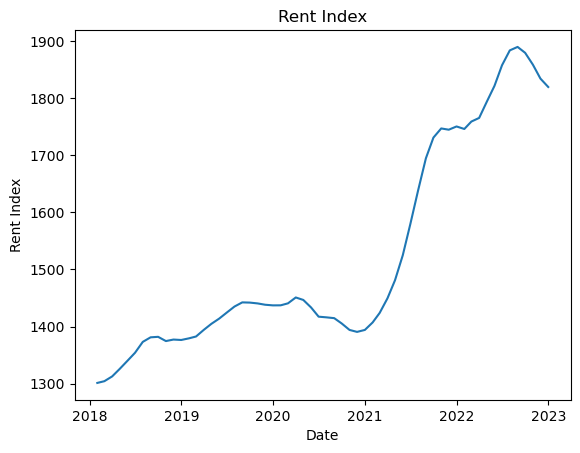

In [334]:
plt.plot(rent_index_df['date'], rent_index_df['Rent Index'])
plt.title('Rent Index')
plt.xlabel('Date')
plt.ylabel('Rent Index')
plt.show()

In [345]:
#Get data for home values
home_value_dates = '2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28'
home_value_date_list = home_value_dates.split(",")

home_values = [167608.8035837665,168157.89227625093,168656.68438250176,169450.50819607807,170048.59312342326,170316.08574215436,170420.8322975954,171018.82363534937,171675.77103341077,172708.68277179482,173394.5146222635,173974.98153447337,174178.74180529665,174198.72592746728,174511.24068417915,175120.05898870536,175658.07240478965,176017.87002395108,176196.93172403538,176454.3815264945,176518.44520297865,176533.0047958923,176517.67928219298,176386.1325975489,176347.89362499374,176024.4782449916,175876.13434362027,175670.08851576364,175517.36311463444,175282.23232243326,174954.45476514392,174775.18623198228,174842.09368151615,174863.95033053283,174811.12007836136,174443.08037768994,174142.20789667065,174086.7209759214,174368.31352148842,174700.05954266342,174885.85628239295,174899.41069897544,175111.3589118624,175337.76538045856,175409.45351037648,175298.7817952711,175084.92841962422,175011.03391819986,174959.47852360804,175458.73667473148,176210.85092247042,177062.95479953362,177560.60606661896,177794.06243041306,178118.82707717028,178701.45130612617,179717.3854044055,180639.1614749656,181278.33714567267,181676.89249468758,181968.9355349232,182184.76716034845,182333.58543870613,182747.46154038093,183367.0106073668,184240.167769494,185084.0512498061,185790.84705156225,186392.19126025497,186715.0003589675,187151.772628366,187620.26441017,188119.33678502927,188423.52811457077,188436.8019448379,188519.59110881665,188713.41232329197,189233.5689082033,189942.5653001858,190806.69655698023,191779.36385306608,192562.85206645392,193293.6338668155,193978.6052523248,194735.9845136922,195338.15051582255,195791.43559507045,196352.1180422214,196951.38326110432,197588.17981423685,198213.0176523288,198919.51258107566,199566.85938791768,200164.6317467248,200792.52610999896,201464.9311781377,201941.61262612816,202038.45290436046,202136.86322321123,202269.6266922611,202515.42611308862,202343.66439286104,202047.61595446573,201482.61042398354,200942.95013684072,200178.25068818088,198922.62717215353,197697.03969128928,196626.55932854407,196028.47295311614,195364.62478366983,194721.0580516983,194229.5062580914,194098.15476742934,194051.43224077238,193987.83812572993,193769.54746833144,193440.9264360309,193454.81162554224,193455.08556564746,193265.7540215541,193050.67858124102,192910.87574381765,193133.07922486364,193511.96791306188,193797.89941904307,193458.09370792483,192592.08141963734,191448.6332605191,190365.50144462986,189321.54502557486,188275.5519978999,187461.74994279537,186504.83872135726,185932.01814402282,185828.49267756718,185944.33740949645,185790.2073327082,185492.51561522644,185489.97441430073,185704.12140618055,185714.618829533,185482.76491306475,185292.54335776428,185501.41546791143,185890.3678829931,186484.88672829294,187050.10631872283,187717.83266363,188608.74657934034,189663.70331355408,190828.55963011333,191992.73903071284,193182.08724697455,194463.05961918377,195703.792180892,197153.87260694374,198808.03368886808,200589.63116723436,202385.65246831477,204130.44605233494,206295.7947138844,208460.03477356661,210644.90491020645,212562.50574002473,214398.3359572102,216168.61115701162,217890.17271337667,219854.4525607048,221928.57747397057,224151.5903550062,226375.54577552513,228757.7857832807,231116.77258106114,233517.28442175745,235652.84780248927,237616.98256583977,239267.09152362283,241159.33257648558,243211.86349849627,245728.9361705058,248303.03465623138,250894.96427521986,253003.17567490207,254902.83650902924,256631.67449435918,258455.87282649276,260317.56737749596,262233.68053909164,264100.8370908175,266009.7175600159,267883.01261712034,270018.1407318989,272073.53274521016,273753.5025146366,275240.8742159913,276699.15860828565,278345.6662620435,279685.9043523247,280610.21234516444,281355.76315523783,282348.0764373579,283858.73435838334,285736.48146611283,287603.2312774608,289248.4701147207,290664.5076163353,292063.80967197503,292982.14949321,293581.9114515917,293910.3681348644,294474.615068441,295234.7661360327,296188.67724022846,297216.04207908147,298459.139005175,299582.5571498862,300581.77133120876,301698.7032035754,302616.3953986182,303579.8102502593,304284.0776335906,305299.06928843044,306179.4035838424,307004.34107436374,307753.0418530996,308714.7380729937,309823.8348914588,310616.7319432097,311250.7356797391,311772.02754221886,312343.4483976502,313043.39111529576,313810.99702688056,314702.27929917834,315757.4006526384,317024.06453931675,318794.75120406103,320930.52562219923,323371.26185898745,326134.9869890239,329020.1761008093,332006.1702595434,334462.1782682313,335943.944557393,336904.629183532,338440.0061765903,341456.4484559165,346175.8705603374,351817.96548491967,358303.5434315624,365122.61946709594,372680.51944719785,380822.85697944026,390505.3127959574,402615.9711819855,416962.03105731605,431168.82032281015,441667.3201664146,447565.55163304304,449681.19261691434,451261.3296649828,454134.7491281216,458982.25163833256,467402.95709950523,478581.2979073817,492683.8089580108,506676.83809444186,518514.9503088879,525655.6085209312,526272.4054471467,521794.2262480285,514212.9265673575,506678.7397275853,499320.16186073236,491549.33545924793,484644.15950875013,479240.5714582668]

print(date_list)

home_value_df = pd.DataFrame({'date': home_value_date_list})
home_value_df ['Home Values'] = home_values

home_value_df['date'] = pd.to_datetime(home_value_df['date'])
home_value_df['month'] = home_value_df['date'].dt.month
home_value_df['year'] = home_value_df['date'].dt.year
home_value_df = home_value_df.sort_values('date')
home_value_df = home_value_df[(home_value_df['date'] >= '2018-01-31') & (home_value_df['date'] <= '2022-01-31')]
home_value_df = home_value_df.reset_index(drop=True)

home_value_df

#Create rent index dfs by year
home_value_2022 = home_value_df.loc[(home_value_df["year"] == 2022)]
home_value_2021 = home_value_df.loc[(home_value_df["year"] == 2021)]
home_value_2020 = home_value_df.loc[(home_value_df["year"] == 2020)]
home_value_2019 = home_value_df.loc[(home_value_df["year"] == 2019)]
home_value_2018 = home_value_df.loc[(home_value_df["year"] == 2018)]

#Sum up all values by year
home_value_2022 = home_value_2022["Home Values"].sum()
home_value_2021 = home_value_2021["Home Values"].sum()
home_value_2020 = home_value_2020["Home Values"].sum()
home_value_2019 = home_value_2019["Home Values"].sum()
home_value_2018 = home_value_2018["Home Values"].sum()

#Take the average for each year
avg_home_value_2022 = home_value_2022/12
avg_home_value_2021 = home_value_2021/12
avg_home_value_2020 = home_value_2020/12
avg_home_value_2019 = home_value_2019/12
avg_home_value_2018 = home_value_2018/12

# Rate of Change - Home Values
values_18_20 = home_value_df[(home_value_df['date'] >= '2018-01-31') & (home_value_df['date'] <= '2020-01-31')]
delta_value = values_18_20['Home Values'].iloc[-1] - values_18_20['Home Values'].iloc[0]
delta_time_values = (values_18_20['date'].iloc[-1] - values_18_20['date'].iloc[0]).days / 365
values_delta_18_20 = delta_value / delta_time_values


values_20_22 = home_value_df[(home_value_df['date'] >= '2020-01-31') & (home_value_df['date'] <= '2022-01-31')]
delta_value = values_20_22['Home Values'].iloc[-1] - values_20_22['Home Values'].iloc[0]
delta_time_values = (values_20_22['date'].iloc[-1] - values_20_22['date'].iloc[0]).days / 365
values_delta_20_22 = delta_value / delta_time_values


print(values_delta_18_20)
print(values_delta_20_22)

['2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021

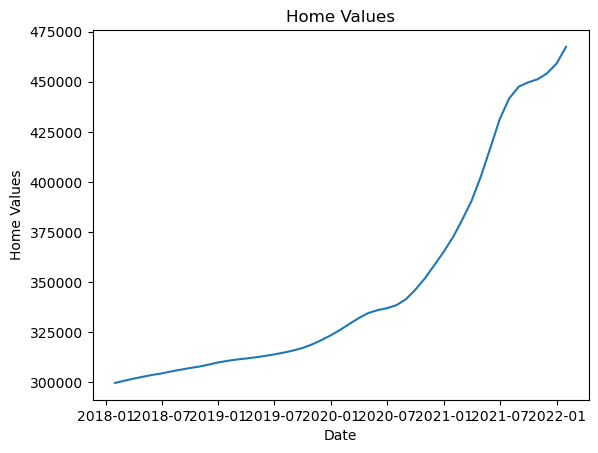

In [344]:
#Create home valye graph
plt.plot(home_value_df['date'], home_value_df['Home Values'])
plt.title('Home Values')
plt.xlabel('Date')
plt.ylabel('Home Values')
plt.show()


In [346]:
#Create df for each year
df_2022 = merge_5.loc[(merge_5["Year"] == 2022)]
df_2021 = merge_5.loc[(merge_5["Year"] == 2021)]
df_2020 = merge_5.loc[(merge_5["Year"] == 2020)]
df_2019 = merge_5.loc[(merge_5["Year"] == 2019)]
df_2018 = merge_5.loc[(merge_5["Year"] == 2018)]

#Sum up columns for the entire year
#2022
job_openings_2022 = df_2022["# of job openings"].sum()
labor_force_2022 = df_2022["Labor Force"].sum()
employment_number_2022 = df_2022["Employment Number"].sum()
unemployment_rate_2022 = df_2022["Unemployment Rate"].sum()
unemployment_number_2022 = df_2022["Unemployment Number"].sum()
cpi_2022 = df_2022["CPI of TX"].sum()
#2021
job_openings_2021 = df_2021["# of job openings"].sum()
labor_force_2021 = df_2021["Labor Force"].sum()
employment_number_2021 = df_2021["Employment Number"].sum()
unemployment_rate_2021 = df_2021["Unemployment Rate"].sum()
unemployment_number_2021 = df_2021["Unemployment Number"].sum()
cpi_2021 = df_2021["CPI of TX"].sum()
#2020
job_openings_2020 = df_2020["# of job openings"].sum()
labor_force_2020 = df_2020["Labor Force"].sum()
employment_number_2020 = df_2020["Employment Number"].sum()
unemployment_rate_2020 = df_2020["Unemployment Rate"].sum()
unemployment_number_2020 = df_2020["Unemployment Number"].sum()
cpi_2020 = df_2020["CPI of TX"].sum()
#2019
job_openings_2019 = df_2019["# of job openings"].sum()
labor_force_2019 = df_2019["Labor Force"].sum()
employment_number_2019 = df_2019["Employment Number"].sum()
unemployment_rate_2019 = df_2019["Unemployment Rate"].sum()
unemployment_number_2019 = df_2019["Unemployment Number"].sum()
cpi_2019 = df_2019["CPI of TX"].sum()
#2018
job_openings_2018 = df_2018["# of job openings"].sum()
labor_force_2018 = df_2018["Labor Force"].sum()
employment_number_2018 = df_2018["Employment Number"].sum()
unemployment_rate_2018 = df_2018["Unemployment Rate"].sum()
unemployment_number_2018 = df_2018["Unemployment Number"].sum()
cpi_2018 = df_2018["CPI of TX"].sum()

# Get averge of each column
#2022
avg_job_openings_2022 = job_openings_2022/12
avg_labor_force_2022 = labor_force_2022/12
avg_employment_number_2022 = employment_number_2022/12
avg_unemployment_rate_2022 = unemployment_rate_2022/12
avg_unemployment_number_2022 = unemployment_number_2022/12
avg_cpi_2022 = cpi_2022/12
#2021
avg_job_openings_2021 = job_openings_2021/12
avg_labor_force_2021 = labor_force_2021/12
avg_employment_number_2021 = employment_number_2021/12
avg_unemployment_rate_2021 = unemployment_rate_2021/12
avg_unemployment_number_2021 = unemployment_number_2021/12
avg_cpi_2021 = cpi_2021/12
#2020
avg_job_openings_2020 = job_openings_2020/12
avg_labor_force_2020 = labor_force_2020/12
avg_employment_number_2020 = employment_number_2020/12
avg_unemployment_rate_2020 = unemployment_rate_2020/12
avg_unemployment_number_2020 = unemployment_number_2020/12
avg_cpi_2020 = cpi_2020/12
#2019
avg_job_openings_2019 = job_openings_2019/12
avg_labor_force_2019 = labor_force_2019/12
avg_employment_number_2019 = employment_number_2019/12
avg_unemployment_rate_2019 = unemployment_rate_2019/12
avg_unemployment_number_2019 = unemployment_number_2019/12
avg_cpi_2019 = cpi_2019/12
#2018
avg_job_openings_2018 = job_openings_2018/12
avg_labor_force_2018 = labor_force_2018/12
avg_employment_number_2018 = employment_number_2018/12
avg_unemployment_rate_2018 = unemployment_rate_2018/12
avg_unemployment_number_2018 = unemployment_number_2018/12
avg_cpi_2018 = cpi_2018/12


#Create final dataframes to store data by year for analysis
yearly_df = pd.DataFrame({
    "Year" : [2018, 2019, 2020, 2021, 2022],
    "Average Job Openings" : [round(avg_job_openings_2018,0),round(avg_job_openings_2019,0),round(avg_job_openings_2020,0),round(avg_job_openings_2021,0),round(avg_job_openings_2022,0)],
    "Average Labor Force": [round(avg_labor_force_2018,0), round(avg_labor_force_2019,0), round(avg_labor_force_2020,0), round(avg_labor_force_2021,0), round(avg_labor_force_2022,0)],
    "Average Employment Number": [round(avg_employment_number_2018,0), round(avg_employment_number_2019,0), round(avg_employment_number_2020,0), round(avg_employment_number_2021,0), round(avg_employment_number_2022,0)],
    "Average Unemployment Rate": [round(avg_unemployment_rate_2018,2),round(avg_unemployment_rate_2019,2),round(avg_unemployment_rate_2020,2),round(avg_unemployment_rate_2021,2),round(avg_unemployment_rate_2022,2)],
    "Average Unemployment Number": [round(avg_unemployment_number_2018,0),round(avg_unemployment_number_2019,0),round(avg_unemployment_number_2020,0),round(avg_unemployment_number_2021,0),round(avg_unemployment_number_2022,0)],
    "Average CPI": [round(avg_cpi_2018,0),round(avg_cpi_2019,0),round(avg_cpi_2020,0),round(avg_cpi_2021,0),round(avg_cpi_2022,0)],
    "Population":[population_2018,population_2019,population_2020,population_2021, population_2022],
    "Average Rent Index": [round(avg_rent_index_2018,0),round(avg_rent_index_2019,0),round(avg_rent_index_2020,0),round(avg_rent_index_2021,0),round(avg_rent_index_2022,0)],
    "Average Home Value": [round(avg_home_value_2018,0), round(avg_home_value_2019,0),round(avg_home_value_2020,0),round(avg_home_value_2021,0),round(avg_home_value_2022,0)]
})
yearly_df

,Year,Average Job Openings,Average Labor Force,Average Employment Number,Average Unemployment Rate,Average Unemployment Number,Average CPI,Population,Average Rent Index,Average Home Value
0,2018,540583.0,13714126.0,13178793.0,3.91,535333.0,229.0,28701845,1350.0,304760.0
1,2019,575417.0,13921780.0,13429073.0,3.52,492708.0,233.0,28701845,1420.0,315285.0
2,2020,484750.0,13955331.0,12883802.0,7.72,1071529.0,234.0,29145505,1420.0,341316.0
3,2021,827750.0,14311028.0,13503671.0,5.64,807358.0,245.0,28701845,1598.0,424837.0
4,2022,969417.0,14662558.0,14092833.0,3.88,569725.0,266.0,30029572,1826.0,38950.0
